<div style="font-size:20px"><b>ЗАВДАННЯ 1</b></div>

Gaussian Naive Bayes Recall: 0.8120237087214225
Support Vector Machine Recall: 0.28111769686706184
Gaussian Naive Bayes f1-score: 0.6595598349381017
Support Vector Machine f1-score: 0.4082385490316631


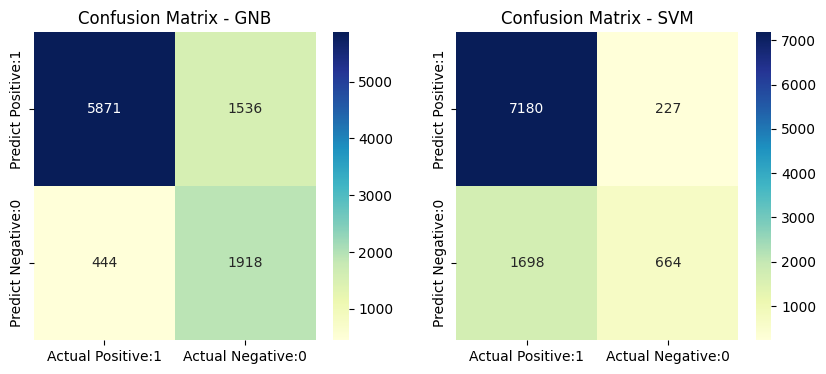

Gaussian Naive Bayes accuracy score: 0.7973180468829972
Support Vector Machine accuracy score: 0.8029481011362473
Null accuracy score: 0.7582147609786057
Training set score: 0.799973674973675
Test set score: 0.7973180468829972


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

data = '1.csv'

df = pd.read_csv(data, header=None, sep=', ', engine='python')

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.head(5)
X = df.drop(['income'], axis=1)
y = df['income']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)
#!pip install category_encoders
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

from sklearn.preprocessing import RobustScaler
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

from sklearn.metrics import recall_score

recall_gnb = recall_score(y_test, y_pred_gnb, pos_label='>50K')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='>50K')
print('Gaussian Naive Bayes Recall:', recall_gnb)
print('Support Vector Machine Recall:', recall_svm)
from sklearn.metrics import f1_score

f1_gnb = f1_score(y_test, y_pred_gnb, pos_label='>50K')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='>50K')
print('Gaussian Naive Bayes f1-score:', f1_gnb)
print('Support Vector Machine f1-score:', f1_svm)
from sklearn.metrics import confusion_matrix

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_svm = confusion_matrix(y_test, y_pred_svm)

cm_matrix_gnb = pd.DataFrame(data=cm_gnb, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
cm_matrix_svm = pd.DataFrame(data=cm_svm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_matrix_gnb, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix - GNB')
plt.subplot(1, 2, 2)
plt.title('Confusion Matrix - SVM')
sns.heatmap(cm_matrix_svm, annot=True, fmt='d', cmap='YlGnBu')

plt.show()

from sklearn.metrics import accuracy_score

print(f'Gaussian Naive Bayes accuracy score: {(accuracy_score(y_test, y_pred_gnb))}')
print(f'Support Vector Machine accuracy score: {(accuracy_score(y_test, y_pred_svm))}')

y_test.value_counts()
null_accuracy = (7407/(7407+2362))

print(f'Null accuracy score: {null_accuracy}')
print(f'Training set score: {gnb.score(X_train, y_train)}')

print(f'Test set score: {gnb.score(X_test, y_test)}')

ЗАВДАННЯ 2

Train set: (750, 11) (750,)
Test set: (250, 11) (250,)
Euclodean metric Recall: 0.332
Manhattan metric Recall: 0.332
Minkowski metric Recall: 0.332
Euclodean metric f1-score: 0.3244435923308076
Manhattan metric f1-score: 0.32324650208877104
Minkowski metric f1-score: 0.3244435923308076


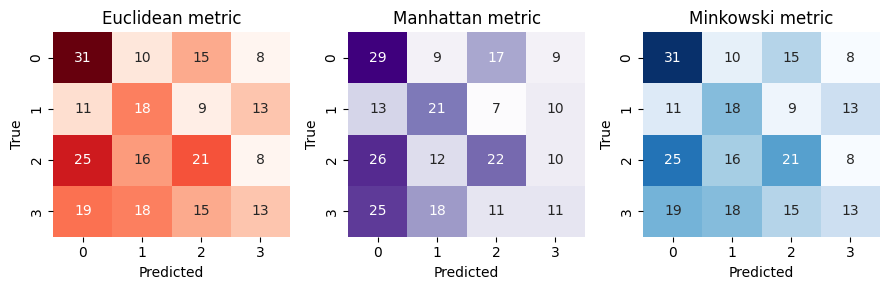

Test set Accuracy for Euclodean metric:  0.332
Test set Accuracy for Manhattan metric:  0.332
Test set Accuracy for Minkowski metric:  0.332
Null accuracy score: 0.28
Training set score: 0.5413333333333333
Test set score: 0.332
Training set score: 0.544
Test set score: 0.332
Training set score: 0.5413333333333333
Test set score: 0.332


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
df = pd.read_csv('2.csv')
df.head()
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]
y = df['custcat'].values
y[0:5]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn.neighbors import KNeighborsClassifier
k = 4

#Train Model
euclidean = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train,y_train)

#Train Model
manhattan = KNeighborsClassifier(n_neighbors = k, metric='manhattan').fit(X_train,y_train)

#Train Model
minkowski = KNeighborsClassifier(n_neighbors = k, metric='minkowski').fit(X_train,y_train)

yhat_euclidean = euclidean.predict(X_test)
yhat_manhattan = manhattan.predict(X_test)
yhat_minkowski = minkowski.predict(X_test)

yhat_euclidean[0:10], yhat_manhattan[0:10], yhat_minkowski[0:10]

from sklearn.metrics import recall_score
# Calculate and compare recall scores
recall_euclidean = recall_score(y_test, yhat_euclidean, average='weighted')
recall_manhattan = recall_score(y_test, yhat_manhattan, average='weighted')
recall_minkowski = recall_score(y_test, yhat_minkowski, average='weighted')
print('Euclodean metric Recall:', recall_euclidean)
print('Manhattan metric Recall:', recall_manhattan)
print('Minkowski metric Recall:', recall_minkowski)

from sklearn.metrics import f1_score

f1_euclidean = f1_score(y_test, yhat_euclidean, average='weighted')
f1_manhattan = f1_score(y_test, yhat_manhattan, average='weighted')
f1_minkowski = f1_score(y_test, yhat_minkowski, average='weighted')
print('Euclodean metric f1-score:', f1_euclidean)
print('Manhattan metric f1-score:', f1_manhattan)
print('Minkowski metric f1-score:', f1_minkowski)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_euclidean = confusion_matrix(y_test, yhat_euclidean)
cm_manhattan = confusion_matrix(y_test, yhat_manhattan)
cm_minkowski = confusion_matrix(y_test, yhat_minkowski)

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
sns.heatmap(cm_euclidean, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Euclidean metric')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(1, 3, 2)
sns.heatmap(cm_manhattan, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Manhattan metric')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(1, 3, 3)
sns.heatmap(cm_minkowski, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Minkowski metric')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

from sklearn import metrics

print("Test set Accuracy for Euclodean metric: ", metrics.accuracy_score(y_test, yhat_euclidean))
print("Test set Accuracy for Manhattan metric: ", metrics.accuracy_score(y_test, yhat_manhattan))
print("Test set Accuracy for Minkowski metric: ", metrics.accuracy_score(y_test, yhat_minkowski))

pd.Series(y_test).value_counts()

null_accuracy = (70/(70+65+64+51))

print(f'Null accuracy score: {null_accuracy}')
print(f'Training set score: {euclidean.score(X_train, y_train)}')

print(f'Test set score: {euclidean.score(X_test, y_test)}')

print(f'Training set score: {manhattan.score(X_train, y_train)}')

print(f'Test set score: {manhattan.score(X_test, y_test)}')

print(f'Training set score: {minkowski.score(X_train, y_train)}')

print(f'Test set score: {minkowski.score(X_test, y_test)}')

Завдання 3

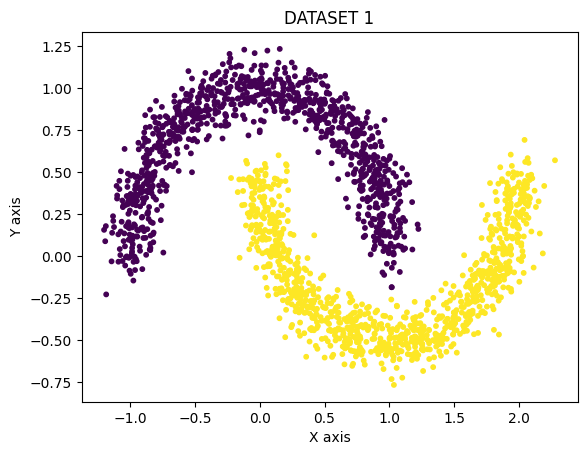

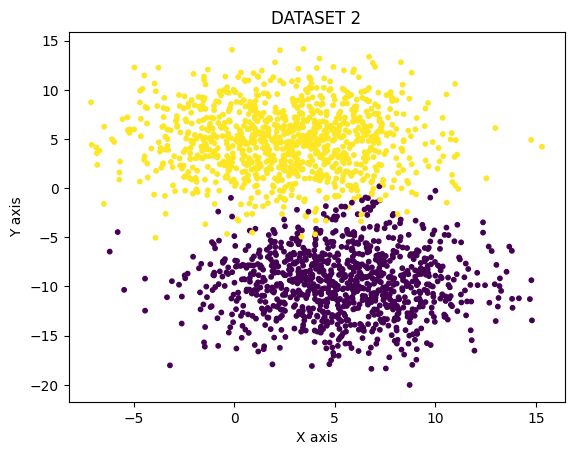

[0 1 1 ... 0 0 1] (2000,)
[1 0 1 ... 1 0 1] (2000,)
[0 1 1 ... 0 0 0] (2000,)
[0 1 0 ... 0 1 0] (2000,)
[0 1 1 ... 0 1 1] (2000,)
[0 0 0 ... 0 0 0] (2000,)


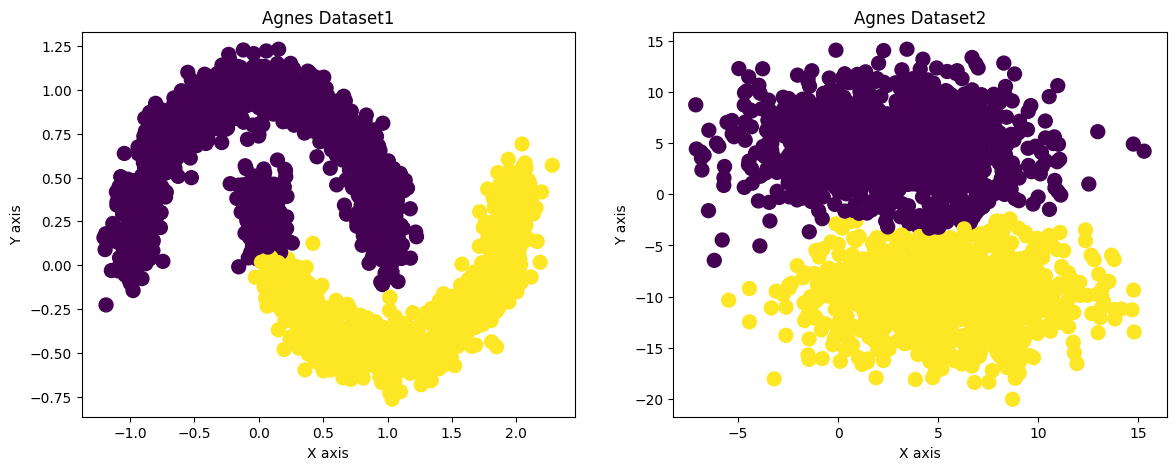

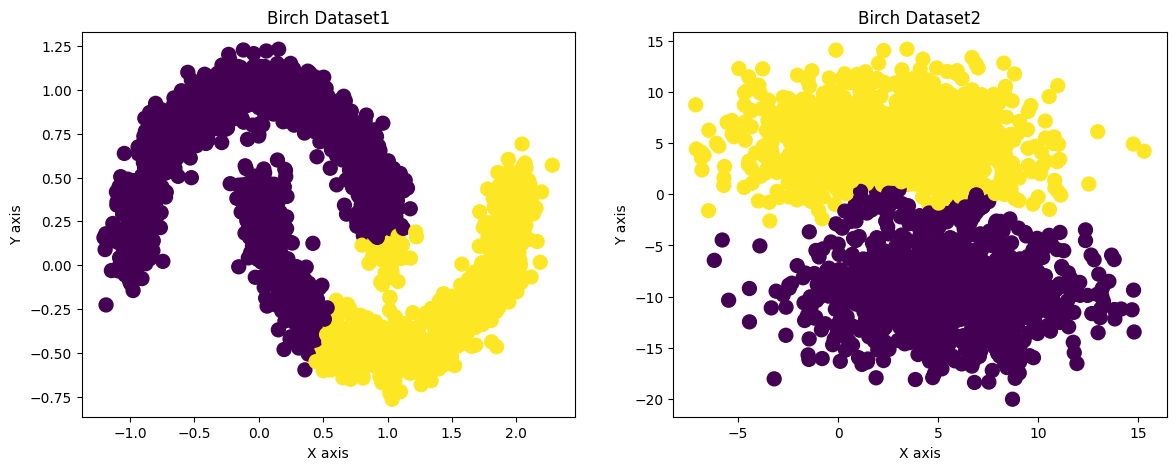

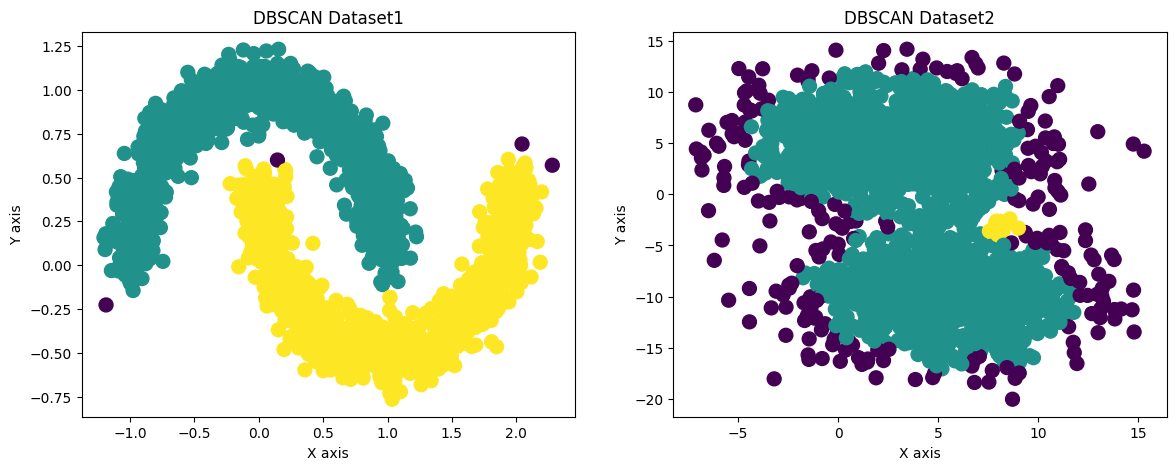

Dataset1:
Silhouette Coefficient with Birch :0.45835031870569487
Silhouette Coefficient with Dbscan : 0.3010813290557993
Silhouette Coefficient with Agnes : 0.40621615915378817
Dataset2:
Silhouette Coefficient with Birch :0.5760880178842558
Silhouette Coefficient with Dbscan : -0.16260384238870432
Silhouette Coefficient with Agnes : 0.5878339188420266
DATASET1:
ARI of Birch :0.3767076067566142
ARI of Dbscan: 0.9920149895714532
ARI of Agnes: 0.7155769186783432
DATASET2:
ARI of Birch :0.872292314560211
ARI of Dbscan: -0.00016436623002222448
ARI of Agnes: 0.90816307882887
DATASET1:
NMI of Birch :0.341366173543779
NMI of Dbscan: 0.9787649300611727
NMI of Agnes: 0.6713586477684496
DATASET2:
NMI of Birch :0.8102453395167878
NMI of Dbscan: 0.0003860936378014513
NMI of Agnes: 0.8427393441408568


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization
import os
np.random.seed(10)

from sklearn import cluster, datasets, mixture
X1,Y1 = datasets.make_moons(n_samples=2000, noise=.09,random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=Y1)
plt.title('DATASET 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

from sklearn.datasets import make_blobs
X3,Y3  = make_blobs(n_samples=2000,cluster_std=3.5,centers=2, n_features=2,random_state=10)
plt.title('DATASET 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=Y3)
plt.show()

from sklearn.cluster import AgglomerativeClustering

agnes1 = AgglomerativeClustering(n_clusters=2)
y_agnes1 = agnes1.fit_predict(X1)
print(y_agnes1, y_agnes1.shape)

agnes2 = AgglomerativeClustering(n_clusters=2)
y_agnes2 = agnes2.fit_predict(X3)
print(y_agnes2, y_agnes2.shape)

from sklearn.cluster import Birch

birch1 = Birch(n_clusters=2,threshold=0.5,branching_factor=100)
y_birch1 = birch1.fit_predict(X1)
print(y_birch1, y_birch1.shape)

birch2 = Birch(n_clusters=2,threshold=0.1,branching_factor=100)
y_birch2 = birch2.fit_predict(X3)
print(y_birch2, y_birch2.shape)

from sklearn.cluster import DBSCAN

dbscan1 = DBSCAN(eps=.2, min_samples=70)
y_dbscan1 = dbscan1.fit_predict(X1)
print(y_dbscan1, y_dbscan1.shape)

dbscan2 = DBSCAN(eps=1, min_samples=10)
y_dbscan2 = dbscan2.fit_predict(X3)
print(y_dbscan2, y_dbscan2.shape)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_agnes1)
plt.title('Agnes Dataset1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.subplot(1,2,2)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_agnes2)
plt.title('Agnes Dataset2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_birch1)
plt.title('Birch Dataset1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.subplot(1,2,2)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_birch2)
plt.title('Birch Dataset2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y_dbscan1)
plt.title('DBSCAN Dataset1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.subplot(1,2,2)
plt.scatter(X3[:, 0], X3[:, 1], s=100, c=y_dbscan2)
plt.title('DBSCAN Dataset2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

from sklearn.metrics import silhouette_score

print("Dataset1:")
sil_birch=silhouette_score(X1,y_birch1)
sil_dbscan=silhouette_score(X1,y_dbscan1)
sil_agnes=silhouette_score(X1,y_agnes1)

print("Silhouette Coefficient with Birch :"+ str(sil_birch))
print("Silhouette Coefficient with Dbscan : "+ str(sil_dbscan))
print("Silhouette Coefficient with Agnes : "+ str(sil_agnes))


print("Dataset2:")
sil_birch=silhouette_score(X3,y_birch2)
sil_dbscan=silhouette_score(X3,y_dbscan2)
sil_agnes=silhouette_score(X3,y_agnes2)

print("Silhouette Coefficient with Birch :"+ str(sil_birch))
print("Silhouette Coefficient with Dbscan : "+ str(sil_dbscan))
print("Silhouette Coefficient with Agnes : "+ str(sil_agnes))

from sklearn.metrics.cluster import adjusted_rand_score

print("DATASET1:")
ari_birch=adjusted_rand_score(Y1,y_birch1)
ari_dbscan=adjusted_rand_score(Y1,y_dbscan1)
ari_agnes=adjusted_rand_score(Y1,y_agnes1)

print("ARI of Birch :"+ str(ari_birch))
print("ARI of Dbscan: "+ str(ari_dbscan))
print("ARI of Agnes: "+ str(ari_agnes))


print("DATASET2:")
ari_birch=adjusted_rand_score(Y3,y_birch2)
ari_dbscan=adjusted_rand_score(Y3,y_dbscan2)
ari_agnes=adjusted_rand_score(Y3,y_agnes2)

print("ARI of Birch :"+ str(ari_birch))
print("ARI of Dbscan: "+ str(ari_dbscan))
print("ARI of Agnes: "+ str(ari_agnes))


from sklearn.metrics.cluster import normalized_mutual_info_score

print("DATASET1:")
nmi_birch=normalized_mutual_info_score(Y1,y_birch1)
nmi_dbscan=normalized_mutual_info_score(Y1,y_dbscan1)
nmi_agnes=normalized_mutual_info_score(Y1,y_agnes1)

print("NMI of Birch :"+ str(nmi_birch))
print("NMI of Dbscan: "+ str(nmi_dbscan))
print("NMI of Agnes: "+ str(nmi_agnes))


print("DATASET2:")
nmi_birch=normalized_mutual_info_score(Y3,y_birch2)
nmi_dbscan=normalized_mutual_info_score(Y3,y_dbscan1)
nmi_agnes=normalized_mutual_info_score(Y3,y_agnes2)

print("NMI of Birch :"+ str(nmi_birch))
print("NMI of Dbscan: "+ str(nmi_dbscan))
print("NMI of Agnes: "+ str(nmi_agnes))

Завдання 4

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mall_data = pd.read_csv('4.csv')
print(mall_data.head(5))

from sklearn.cluster import KMeans

X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

from sklearn.cluster import AffinityPropagation

AF = AffinityPropagation(preference=-11800).fit(X_numerics)

AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


# Plotly interactive 3D plot

trace0 = tracer(AF_clustered, 0, 'Cluster 0')
trace1 = tracer(AF_clustered, 1, 'Cluster 1')
trace2 = tracer(AF_clustered, 2, 'Cluster 2')
trace3 = tracer(AF_clustered, 3, 'Cluster 3')
trace4 = tracer(AF_clustered, 4, 'Cluster 4')
trace5 = tracer(AF_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by Affinity Propagation',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

from sklearn.cluster import DBSCAN

DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

from sklearn.metrics import silhouette_score

sil_kmeans=silhouette_score(X_numerics,KM_6_clusters.labels_)
sil_af=silhouette_score(X_numerics,AF.labels_)

print("Silhouette Coefficient with K-Means :"+ str(sil_kmeans))
print("Silhouette Coefficient with Affinity Propagation : "+ str(sil_af))

from sklearn.metrics.cluster import adjusted_rand_score

ari_kmeans=adjusted_rand_score(DBSCAN_clustered.loc[:,'Cluster'],KM6_clustered.loc[:,'Cluster'])
ari_af=adjusted_rand_score(DBSCAN_clustered.loc[:,'Cluster'],AF_clustered.loc[:,'Cluster'])

print("ARI of K-Means :"+ str(ari_kmeans))
print("ARI of Affinity Propagation: "+ str(ari_af))

from sklearn.metrics.cluster import normalized_mutual_info_score

nmi_kmeans=normalized_mutual_info_score(DBSCAN_clustered.loc[:,'Cluster'],KM6_clustered.loc[:,'Cluster'])
nmi_af=normalized_mutual_info_score(DBSCAN_clustered.loc[:,'Cluster'],AF_clustered.loc[:,'Cluster'])

print("NMI of K-Means :"+ str(nmi_kmeans))
print("NMI of Affinity Propagation: "+ str(nmi_af))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficient with K-Means :0.4523443947724053
Silhouette Coefficient with Affinity Propagation : 0.4516490888773576
ARI of K-Means :0.3651876127340171
ARI of Affinity Propagation: 0.367842274887852
NMI of K-Means :0.5792304844451788
NMI of Affinity Propagation: 0.5863552685455267
